# Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.



# Goal

- Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
- Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
- It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

# Data Dictionary
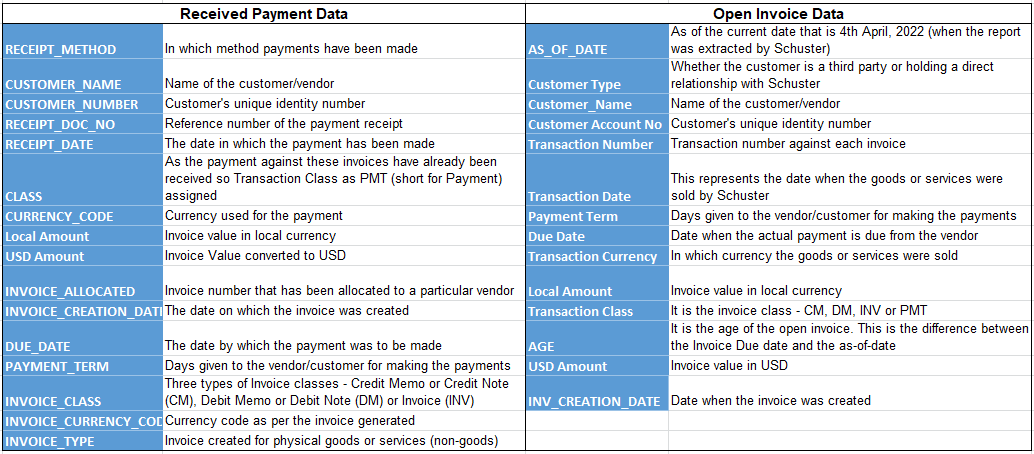

# 1. Importing Libraries and reading data

In [88]:
# Importing libraries and making some display settings

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [89]:
# Reading Received_Payments_Data.csv
df = pd.read_csv('Received_Payments_Data.csv')

In [90]:
df

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93933,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93934,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93935,WIRE,NAMS Corp,21145,NaN,1-Apr-21,PMT,AED,23574.33,23574.33000,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

## Basic EDA

In [92]:
pay=pd.read_csv('Received_Payments_Data.csv')

In [93]:
pay.shape

(93937, 16)

In [94]:
pay.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [95]:
pay[pay['RECEIPT_DOC_NO'].isnull()]
## Meaningful data cannot be rejected.

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
93908,CHEQUE,SENS Corp,48486,NaN,8-Apr-21,PMT,AED,1443.43,1443.43,2.842E+11,16-Feb-21,30-Mar-21,30 Days from EOM,INV,AED,Goods
93909,WIRE,NAMS Corp,21145,NaN,1-Apr-21,PMT,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods
93910,WIRE,GRAN Corp,21312,NaN,8-Apr-21,PMT,USD,41793.60,41793.60,2.842E+11,22-Dec-20,20-Jan-21,30 Days from Inv Date,INV,USD,Goods
93911,WIRE,GRAN Corp,21312,NaN,8-Apr-21,PMT,USD,41793.60,41793.60,2.842E+11,28-Jan-21,28-Jan-21,Immediate,CM,USD,Goods
93912,WIRE,ANAN Corp,21251,NaN,8-Apr-21,PMT,USD,6398.74,6398.74,2.842E+11,11-Mar-21,10-Apr-21,30 Days from Inv Date,INV,AED,Goods
93913,WIRE,NAMS Corp,21145,NaN,7-Apr-21,PMT,AED,4342.99,4342.99,2.842E+11,26-Jan-21,26-Mar-21,60 Days from Inv Date,INV,AED,Goods
93914,WIRE,NAMS Corp,21145,NaN,7-Apr-21,PMT,AED,4342.99,4342.99,2.842E+11,26-Jan-21,26-Mar-21,60 Days from Inv Date,INV,AED,Goods
93915,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,4-Jan-21,28-Feb-21,60 Days from Inv Date,INV,USD,Goods
93916,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,7-Jan-21,7-Jan-21,Immediate,CM,USD,Goods
93917,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,7-Jan-21,7-Jan-21,Immediate,CM,USD,Goods


In [96]:
pay['RECEIPT_METHOD'].value_counts()

WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64

In [97]:
pay['CUSTOMER_NAME'].value_counts()

SEPH Corp    23143
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
KHAW Corp        1
EYEW Corp        1
BRAV Corp        1
NOUS Corp        1
ESSE Corp        1
Name: CUSTOMER_NAME, Length: 690, dtype: int64

In [98]:
pay['CUSTOMER_NUMBER'].value_counts()

1409     14698
15768    11052
2315      9716
7530      5382
1888      5062
         ...  
34989        1
35032        1
51402        1
34956        1
2195         1
Name: CUSTOMER_NUMBER, Length: 1054, dtype: int64

In [99]:
# Different Lengths So the Company Name has Multiple Customer Numbers
pay.groupby(['CUSTOMER_NAME'])['CUSTOMER_NUMBER'].value_counts(ascending=True)

CUSTOMER_NAME  CUSTOMER_NUMBER
3D D Corp      4009               172
6TH  Corp      51440                9
A3 D Corp      23356                5
ABC  Corp      20965                3
ABDU Corp      34219                1
                                 ... 
ZAHR Corp      35012               13
ZAIN Corp      48682               20
               35013               22
ZERO Corp      44781                4
ZV F Corp      42660               11
Name: CUSTOMER_NUMBER, Length: 1054, dtype: int64

In [100]:
pay.groupby(['CUSTOMER_NAME','CUSTOMER_NUMBER']).count()

RECEIPT_METHOD  RECEIPT_DOC_NO  RECEIPT_DATE  \
CUSTOMER_NAME CUSTOMER_NUMBER                                                 
3D D Corp     4009                        172             172           172   
6TH  Corp     51440                         9               9             9   
A3 D Corp     23356                         5               5             5   
ABC  Corp     20965                         3               3             3   
ABDU Corp     34219                         1               1             1   
...                                       ...             ...           ...   
ZAHR Corp     45445                         1               1             1   
ZAIN Corp     35013                        22              22            22   
              48682                        20              20            20   
ZERO Corp     44781                         4               4             4   
ZV F Corp     42660                        11              11            11   

                               CLASS  CURRENCY_CODE  Local Amount  USD Amount  \
CUSTOMER_NAME CUSTOMER_NUMBER                                                   
3D D Corp     4009               172            172           172         172   
6TH  Corp     51440                9              9             9           9   
A3 D Corp     23356                5              5             5           5   
ABC  Corp     20965                3              3             3           3   
ABDU Corp     34219                1              1             1           1   
...                              ...            ...           ...         ...   
ZAHR Corp     45445                1              1             1           1   
ZAIN Corp     35013               22             22            22          22   
              48682               20             20            20          20   
ZERO Corp     44781                4              4             4           4   
ZV F Corp     42660               11             11            11          11   

                               INVOICE_ALLOCATED  INVOICE_CREATION_DATE  \
CUSTOMER_NAME CUSTOMER_NUMBER                                             
3D D Corp     4009                           172                    172   
6TH  Corp     51440                            9                      9   
A3 D Corp     23356                            5                      5   
ABC  Corp     20965                            3                      3   
ABDU Corp     34219                            1                      1   
...                                          ...                    ...   
ZAHR Corp     45445                            1                      1   
ZAIN Corp     35013                           22                     22   
              48682                           20                     20   
ZERO Corp     44781                            4                      4   
ZV F Corp     42660                           11                     11   

                               DUE_DATE  PAYMENT_TERM  INVOICE_CLASS  \
CUSTOMER_NAME CUSTOMER_NUMBER                                          
3D D Corp     4009                  172           172            172   
6TH  Corp     51440                   9             9              9   
A3 D Corp     23356                   5             5              5   
ABC  Corp     20965                   3             3              3   
ABDU Corp     34219                   1             1              1   
...                                 ...           ...            ...   
ZAHR Corp     45445                   1             1              1   
ZAIN Corp     35013                  22            22             22   
              48682                  20            20             20   
ZERO Corp     44781                   4             4              4   
ZV F Corp     42660                  11            11             11   

                               INVOI

In [101]:
pay['RECEIPT_DATE']=pd.to_datetime(pay['RECEIPT_DATE'], format='%d-%b-%y')
pay['RECEIPT_DATE']

0       2021-04-20
1       2021-01-31
2       2021-01-31
3       2021-01-31
4       2021-01-31
           ...    
93932   2021-04-01
93933   2021-04-01
93934   2021-04-01
93935   2021-04-01
93936   2021-04-08
Name: RECEIPT_DATE, Length: 93937, dtype: datetime64[ns]

In [102]:
pay['CLASS'].value_counts()

PMT    93937
Name: CLASS, dtype: int64

In [103]:
pay.drop(['CLASS'], axis=1, inplace=True)
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  object        
 10  DUE_DATE               93937 non-null  object        
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

In [104]:
pay['CURRENCY_CODE'].value_counts()

SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: CURRENCY_CODE, dtype: int64

<AxesSubplot:xlabel='Local Amount'>

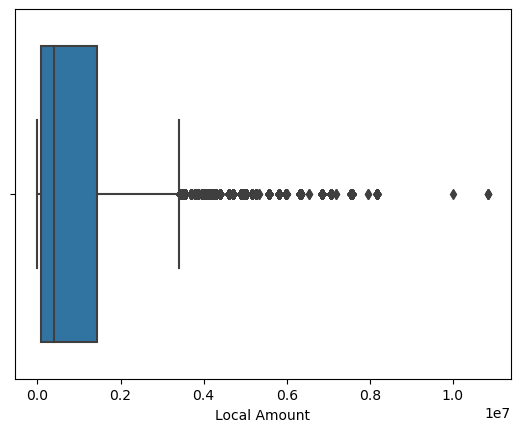

In [105]:
sns.boxplot(pay['Local Amount'])

<AxesSubplot:xlabel='USD Amount'>

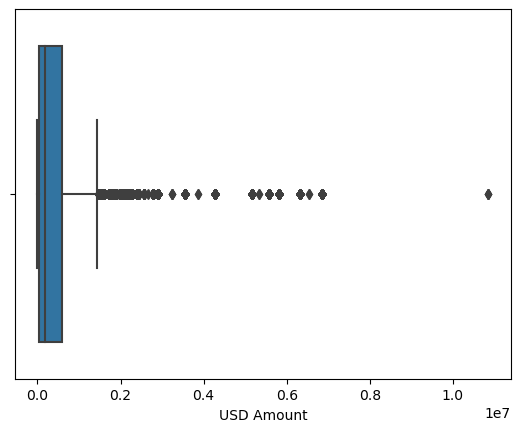

In [106]:
sns.boxplot(pay['USD Amount'])

In [107]:
# Checking Extreme Values
pay[pay['USD Amount']>10000000]
# Local Amount and USD Amount Same

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
60057,WIRE,SEPH Corp,2315,1.560000e+11,2021-02-16,AED,10849828.8,10849828.8,1.5621E+11,3-Jan-21,3-Jan-21,Immediate Payment,INV,AED,Non Goods
60058,WIRE,SEPH Corp,2315,1.560000e+11,2021-02-16,AED,10849828.8,10849828.8,1.5621E+11,14-Feb-21,14-Feb-21,Immediate Payment,INV,AED,Non Goods
60059,WIRE,SEPH Corp,2315,1.560000e+11,2021-02-16,AED,10849828.8,10849828.8,1.5621E+11,26-Jan-21,26-Jan-21,Immediate Payment,INV,AED,Non Goods
60060,WIRE,SEPH Corp,2315,1.560000e+11,2021-02-16,AED,10849828.8,10849828.8,1.5621E+11,12-Jan-21,12-Jan-21,Immediate Payment,INV,AED,Non Goods


In [108]:
# Checking Where Local and USD Values are same 
pay[pay['Local Amount']==pay['USD Amount']]
# There are more than 41,000 Entries

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
48,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
49,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
50,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
51,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
52,WIRE,MAC Corp,1385,1.000000e+11,2021-01-19,AED,49005.48,49005.48,1.0019E+11,26-Sep-19,26-Oct-19,30 Days from Inv Date,INV,USD,Non Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93933,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93934,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93935,WIRE,NAMS Corp,21145,NaN,2021-04-01,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods


In [109]:
# Checking where Currency Code is not USD
pay[pay['Local Amount']==pay['USD Amount']][pay['CURRENCY_CODE']!='USD']
#22,000 Entries

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
48,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
49,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
50,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
51,WIRE,ALLI Corp,7530,1.000000e+11,2021-01-13,AED,6448.74,6448.74,1.002E+11,23-Dec-20,30-Jan-21,30 Days from EOM,INV,AED,Non Goods
52,WIRE,MAC Corp,1385,1.000000e+11,2021-01-19,AED,49005.48,49005.48,1.0019E+11,26-Sep-19,26-Oct-19,30 Days from Inv Date,INV,USD,Non Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93909,WIRE,NAMS Corp,21145,NaN,2021-04-01,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods
93913,WIRE,NAMS Corp,21145,NaN,2021-04-07,AED,4342.99,4342.99,2.842E+11,26-Jan-21,26-Mar-21,60 Days from Inv Date,INV,AED,Goods
93914,WIRE,NAMS Corp,21145,NaN,2021-04-07,AED,4342.99,4342.99,2.842E+11,26-Jan-21,26-Mar-21,60 Days from Inv Date,INV,AED,Goods
93935,WIRE,NAMS Corp,21145,NaN,2021-04-01,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods


In [110]:
# Different Currency Codes where it is not USD
pay[pay['Local Amount']==pay['USD Amount']][pay['CURRENCY_CODE']!='USD']['CURRENCY_CODE'].value_counts()
# Bulk are in AED

AED    20534
EUR     1365
SAR      727
GBP      130
KWD       10
QAR        2
BHD        1
Name: CURRENCY_CODE, dtype: int64

In [111]:
# Checking in which Currency was the Invoice Raised
pay[pay['Local Amount']==pay['USD Amount']][pay['CURRENCY_CODE']!='USD']['INVOICE_CURRENCY_CODE'].value_counts()
#There might be a lot Over Lapping.

AED    15850
SAR     2890
USD     2250
EUR     1358
KWD      144
GBP      129
BHD      104
JOD       28
QAR       16
Name: INVOICE_CURRENCY_CODE, dtype: int64

In [112]:
# We will Consider the USD amount Data as the correct invoice amount for the entire data set.
# Checking the Outliers of Paymnet above 10 million
pay[pay['CUSTOMER_NUMBER']==2315]['USD Amount'].describe()

count    9.716000e+03
mean     1.655296e+06
std      1.247667e+06
min      0.000000e+00
25%      7.266122e+05
50%      1.369543e+06
75%      2.192293e+06
max      1.084983e+07
Name: USD Amount, dtype: float64

<AxesSubplot:xlabel='USD Amount'>

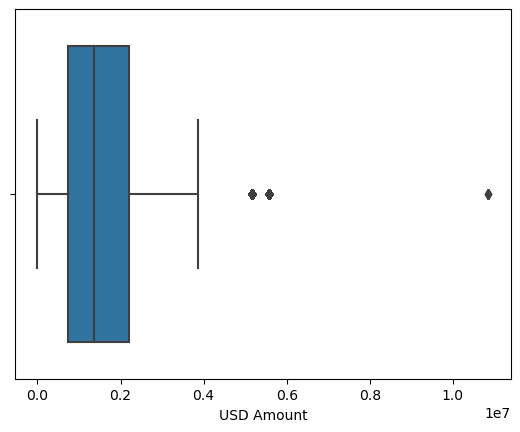

In [113]:
# sns.boxplot(pay[pay['CUSTOMER_NUMBER']==2315]['USD Amount'])
# Dropping the 4 values above 10 million

In [114]:
dropindex=pay[pay['USD Amount']>10000000].index

In [115]:
pay.drop(dropindex,inplace=True)
pay.shape

(93933, 15)

In [116]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93933 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93933 non-null  object        
 1   CUSTOMER_NAME          93933 non-null  object        
 2   CUSTOMER_NUMBER        93933 non-null  int64         
 3   RECEIPT_DOC_NO         93904 non-null  float64       
 4   RECEIPT_DATE           93933 non-null  datetime64[ns]
 5   CURRENCY_CODE          93933 non-null  object        
 6   Local Amount           93933 non-null  float64       
 7   USD Amount             93933 non-null  float64       
 8   INVOICE_ALLOCATED      93933 non-null  object        
 9   INVOICE_CREATION_DATE  93933 non-null  object        
 10  DUE_DATE               93933 non-null  object        
 11  PAYMENT_TERM           93933 non-null  object        
 12  INVOICE_CLASS          93933 non-null  object        
 13  I

### Changing to Date Time Format

In [117]:
pay['INVOICE_CREATION_DATE']=pd.to_datetime(pay['INVOICE_CREATION_DATE'], format='%d-%b-%y')
pay['INVOICE_CREATION_DATE']

0       2020-11-02
1       2020-12-29
2       2021-01-30
3       2020-12-15
4       2020-12-15
           ...    
93932   2020-12-28
93933   2020-12-28
93934   2020-12-28
93935   2021-01-24
93936   2021-02-16
Name: INVOICE_CREATION_DATE, Length: 93933, dtype: datetime64[ns]

In [118]:
pay['DUE_DATE']=pd.to_datetime(pay['DUE_DATE'], format='%d-%b-%y')
pay['DUE_DATE']

0       2020-12-30
1       2021-01-28
2       2021-03-01
3       2021-01-14
4       2021-01-14
           ...    
93932   2020-12-28
93933   2020-12-28
93934   2020-12-28
93935   2021-03-24
93936   2021-03-30
Name: DUE_DATE, Length: 93933, dtype: datetime64[ns]

In [119]:
pay['CREDIT_DAYS']=pay['DUE_DATE']-pay['INVOICE_CREATION_DATE']

In [120]:
pay["DAYS_LATE"]=pay['RECEIPT_DATE']-pay['DUE_DATE']

In [123]:
pay['DAYS_LATE']=pd.to_numeric(pay['DAYS_LATE'].dt.days, downcast='integer')
pay['DAYS_LATE']

0        111
1          3
2        -29
3         17
4         17
        ... 
93932     94
93933     94
93934     94
93935      8
93936      9
Name: DAYS_LATE, Length: 93933, dtype: int16

In [124]:
pay["LATE"]=pay["DAYS_LATE"]>0

In [125]:
pay['LATE']=pay['LATE'].replace({"True":1, "False":0})
pay['LATE'].mean()
#Nearly 66% Late Payments 2 in 3 make late payments.

0.6597681326051548

In [126]:
pay[pay['LATE']==1]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,CREDIT_DAYS,DAYS_LATE,LATE
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,58 days,111,True
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,30 days,3,True
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,30 days,17,True
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,30 days,17,True
5,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,SAR,157500.00,41991.60971,99200000040,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,30 days,17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50000,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,0 days,94,True
93933,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50000,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,0 days,94,True
93934,WIRE,PEAR Corp,21144,NaN,2021-04-01,USD,59914.50,59914.50000,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,0 days,94,True
93935,WIRE,NAMS Corp,21145,NaN,2021-04-01,AED,23574.33,23574.33000,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,59 days,8,True


<AxesSubplot:xlabel='DAYS_LATE', ylabel='Count'>

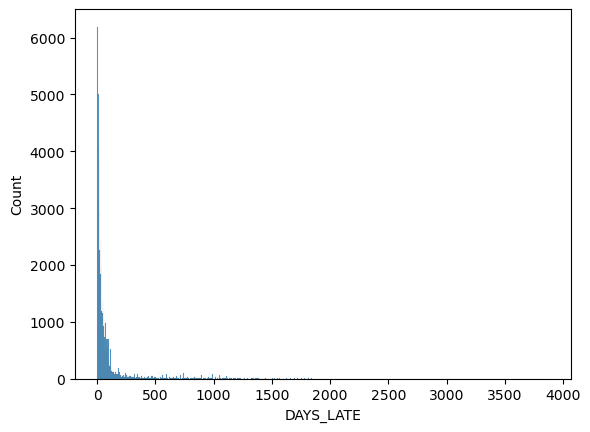

In [127]:
sns.histplot(data=pay[pay['LATE']==1],x='DAYS_LATE')

In [128]:
pay['DAYS_LATE'].describe()

count    93933.000000
mean        70.742306
std        204.415671
min       -340.000000
25%         -4.000000
50%         12.000000
75%         49.000000
max       3873.000000
Name: DAYS_LATE, dtype: float64

<AxesSubplot:xlabel='DAYS_LATE'>

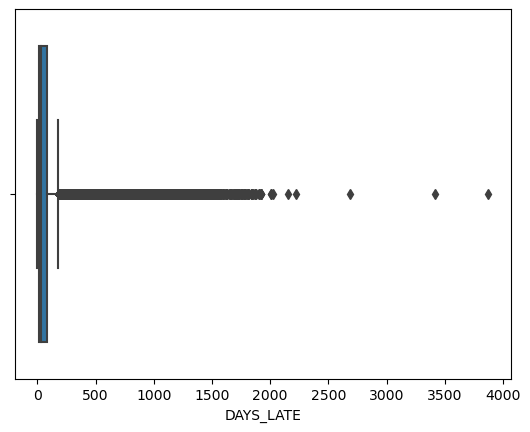

In [129]:
sns.boxplot(data=pay[pay['LATE']==1],x='DAYS_LATE')

<AxesSubplot:xlabel='DAYS_LATE'>

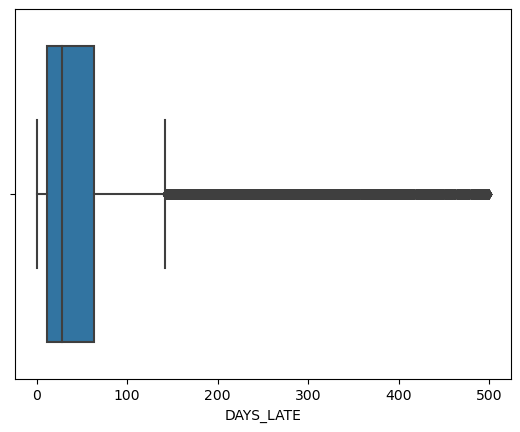

In [130]:
sns.boxplot(data=pay[(pay['DAYS_LATE']<500) & (pay['DAYS_LATE']>0)], x='DAYS_LATE')

# We will have to Bin the Data

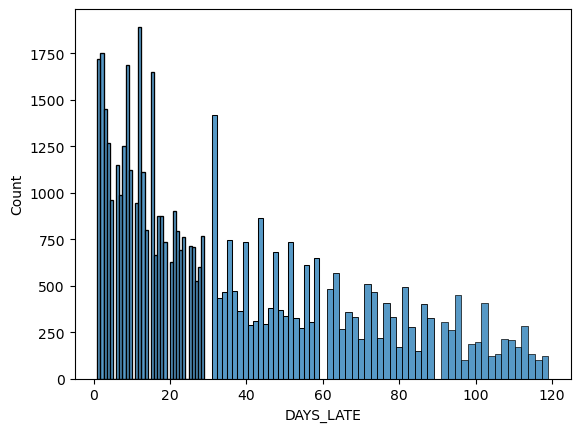

In [131]:
for x in [30,60,90,120]:
    sns.histplot(data=pay[(pay['DAYS_LATE']<x) & (pay['DAYS_LATE']>(x-30))], x='DAYS_LATE')

In [132]:
pay['DELAY']=pd.cut(pay['DAYS_LATE'], [-400,0,15,30,60,90,180,365,4000],
                   labels=['No Delay', '2 Weeks', 'Month', '2 Months', '3 Months',
                          '6 Months', 'Year', 'More than Year'])
pay.DELAY.value_counts(normalize=True)

No Delay          0.340232
2 Weeks           0.210235
2 Months          0.120426
Month             0.118957
3 Months          0.065738
More than Year    0.060213
6 Months          0.056892
Year              0.027307
Name: DELAY, dtype: float64

Text(0.5, 1.0, 'Delay in Payment')

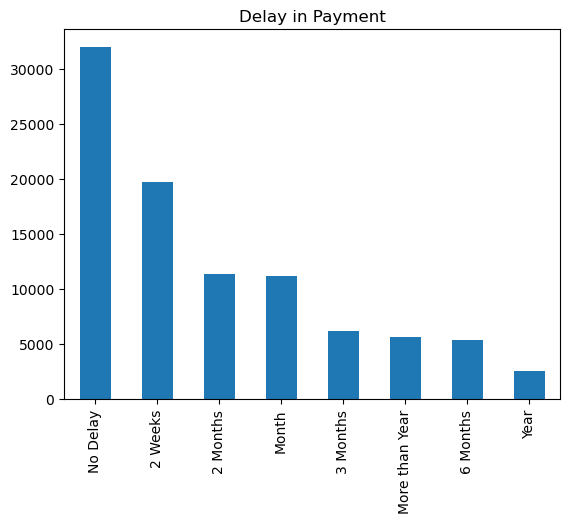

In [133]:
pay.DELAY.value_counts().plot.bar()
plt.title('Delay in Payment')

In [134]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93933 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   RECEIPT_METHOD         93933 non-null  object         
 1   CUSTOMER_NAME          93933 non-null  object         
 2   CUSTOMER_NUMBER        93933 non-null  int64          
 3   RECEIPT_DOC_NO         93904 non-null  float64        
 4   RECEIPT_DATE           93933 non-null  datetime64[ns] 
 5   CURRENCY_CODE          93933 non-null  object         
 6   Local Amount           93933 non-null  float64        
 7   USD Amount             93933 non-null  float64        
 8   INVOICE_ALLOCATED      93933 non-null  object         
 9   INVOICE_CREATION_DATE  93933 non-null  datetime64[ns] 
 10  DUE_DATE               93933 non-null  datetime64[ns] 
 11  PAYMENT_TERM           93933 non-null  object         
 12  INVOICE_CLASS          93933 non-null  object 

In [135]:
pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5470
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [136]:
# Lot of Terms have very low Frequency
terms_freq=pay['PAYMENT_TERM'].value_counts(normalize=True)
terms_freq*100

60 Days from Inv Date                                      21.153375
30 Days from Inv Date                                      15.619644
60 Days from EOM                                           13.326520
30 Days from EOM                                           12.036239
15 Days from EOM                                            8.031256
Immediate Payment                                           5.823300
Immediate                                                   5.600801
90 Days from EOM                                            4.144443
45 Days from Inv Date                                       3.779289
45 Days from EOM                                            3.735641
90 Days from Inv Date                                       2.353805
100% Adv Payment                                            1.321154
25 DAYS FROM EOM                                            0.491840
Cash on Delivery                                            0.444998
15 Days from Inv Date             

In [137]:
df_pay = pay

In [138]:
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5470
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [139]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace('Immediate Payment','Immediate')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
Immediate                                                  10731
15 Days from EOM                                            7544
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM                                                322
On Consignment           

In [140]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['Advance with discount','25% ADVANCE, 75% 30 DAYS FROM INVOICE DATE',
                                               '30% advance 70% after 30 days from invoice date',
                                               '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
                                               '30% advance 70% after 60 days from invoice date',
                                               '50% ADV 50% 30 Days',
                                               '50% Advance 50% INVDATE+60 DAYS',
                                               'LC at 60 days',
                                               'LCSight',
                                               'LC at 90 days',
                                               'LC at 60 days from FCR/AWB/BL date',
                                               'Standby LC at 30 days'],'Partial Adv/LC')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
30 Days from EOM                     11306
Immediate                            10731
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from Inv Date                 3550
45 Days from EOM                      3509
90 Days from Inv Date                 2211
100% Adv Payment                      1241
25 DAYS FROM EOM                       462
Cash on Delivery                       418
Partial Adv/LC                         367
15 Days from Inv Date                  356
45 DAYS + EOM                          322
On Consignment                         264
EOM                                    232
75 Days from EOM                       197
120 Days from Inv Date                 124
75 Days from Inv Date                   59
7 Days from Inv Date                    46
195 days from Invoice Date              23
Cash Agains

In [141]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['Cash on Delivery','On Consignment',
                                               'Cash Against Document at sight'], 'Immediate')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
Immediate                            11419
30 Days from EOM                     11306
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from Inv Date                 3550
45 Days from EOM                      3509
90 Days from Inv Date                 2211
100% Adv Payment                      1241
25 DAYS FROM EOM                       462
Partial Adv/LC                         367
15 Days from Inv Date                  356
45 DAYS + EOM                          322
EOM                                    232
75 Days from EOM                       197
120 Days from Inv Date                 124
75 Days from Inv Date                   59
7 Days from Inv Date                    46
195 days from Invoice Date              23
365 DAYS FROM INVOICE DATE               5
50% at 30 days and 50% at 60 days        2
40 DAYS FRO

In [142]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['100% Adv Payment','Partial Adv/LC']
                                              , 'Part/Full Adv+LC')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
Immediate                            11419
30 Days from EOM                     11306
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from Inv Date                 3550
45 Days from EOM                      3509
90 Days from Inv Date                 2211
Part/Full Adv+LC                      1608
25 DAYS FROM EOM                       462
15 Days from Inv Date                  356
45 DAYS + EOM                          322
EOM                                    232
75 Days from EOM                       197
120 Days from Inv Date                 124
75 Days from Inv Date                   59
7 Days from Inv Date                    46
195 days from Invoice Date              23
365 DAYS FROM INVOICE DATE               5
50% at 30 days and 50% at 60 days        2
40 DAYS FROM EOM                         2
120 Days fr

In [143]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['90 Days from Inv Date','120 Days from Inv Date',
                                              '195 days from Invoice Date',
                                              '365 DAYS FROM INVOICE DATE',
                                              '180 DAYS FROM INV DATE',
                                              '75 Days from EOM','120 Days from EOM'], 
                                              '90+ Days from Inv Date')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
Immediate                            11419
30 Days from EOM                     11306
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from Inv Date                 3550
45 Days from EOM                      3509
90+ Days from Inv Date                2562
Part/Full Adv+LC                      1608
25 DAYS FROM EOM                       462
15 Days from Inv Date                  356
45 DAYS + EOM                          322
EOM                                    232
75 Days from Inv Date                   59
7 Days from Inv Date                    46
50% at 30 days and 50% at 60 days        2
40 DAYS FROM EOM                         2
7 Days from EOM                          1
Name: PAYMENT_TERM, dtype: int64

In [144]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['45 DAYS + EOM','40 DAYS FROM EOM'], '45 Days from EOM')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
Immediate                            11419
30 Days from EOM                     11306
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from EOM                      3833
45 Days from Inv Date                 3550
90+ Days from Inv Date                2562
Part/Full Adv+LC                      1608
25 DAYS FROM EOM                       462
15 Days from Inv Date                  356
EOM                                    232
75 Days from Inv Date                   59
7 Days from Inv Date                    46
50% at 30 days and 50% at 60 days        2
7 Days from EOM                          1
Name: PAYMENT_TERM, dtype: int64

In [145]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace('25 DAYS FROM EOM', '30 Days from EOM')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                14672
60 Days from EOM                     12518
30 Days from EOM                     11768
Immediate                            11419
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from EOM                      3833
45 Days from Inv Date                 3550
90+ Days from Inv Date                2562
Part/Full Adv+LC                      1608
15 Days from Inv Date                  356
EOM                                    232
75 Days from Inv Date                   59
7 Days from Inv Date                    46
50% at 30 days and 50% at 60 days        2
7 Days from EOM                          1
Name: PAYMENT_TERM, dtype: int64

In [146]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace(['15 Days from Inv Date','7 Days from Inv Date',
                                               'EOM','7 Days from EOM'], '30 Days from Inv Date')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                15307
60 Days from EOM                     12518
30 Days from EOM                     11768
Immediate                            11419
15 Days from EOM                      7544
90 Days from EOM                      3893
45 Days from EOM                      3833
45 Days from Inv Date                 3550
90+ Days from Inv Date                2562
Part/Full Adv+LC                      1608
75 Days from Inv Date                   59
50% at 30 days and 50% at 60 days        2
Name: PAYMENT_TERM, dtype: int64

In [147]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace('75 Days from Inv Date', '90 Days from EOM')
df_pay['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                19870
30 Days from Inv Date                15307
60 Days from EOM                     12518
30 Days from EOM                     11768
Immediate                            11419
15 Days from EOM                      7544
90 Days from EOM                      3952
45 Days from EOM                      3833
45 Days from Inv Date                 3550
90+ Days from Inv Date                2562
Part/Full Adv+LC                      1608
50% at 30 days and 50% at 60 days        2
Name: PAYMENT_TERM, dtype: int64

In [148]:
df_pay['PAYMENT_TERM']=df_pay['PAYMENT_TERM'].replace('50% at 30 days and 50% at 60 days', '60 Days from Inv Date')
df_pay['PAYMENT_TERM'].value_counts()
# Finally Reduced No. of Payment Terms.

60 Days from Inv Date     19872
30 Days from Inv Date     15307
60 Days from EOM          12518
30 Days from EOM          11768
Immediate                 11419
15 Days from EOM           7544
90 Days from EOM           3952
45 Days from EOM           3833
45 Days from Inv Date      3550
90+ Days from Inv Date     2562
Part/Full Adv+LC           1608
Name: PAYMENT_TERM, dtype: int64

Text(0.5, 1.0, 'Payment Terms and Late Payment Freq')

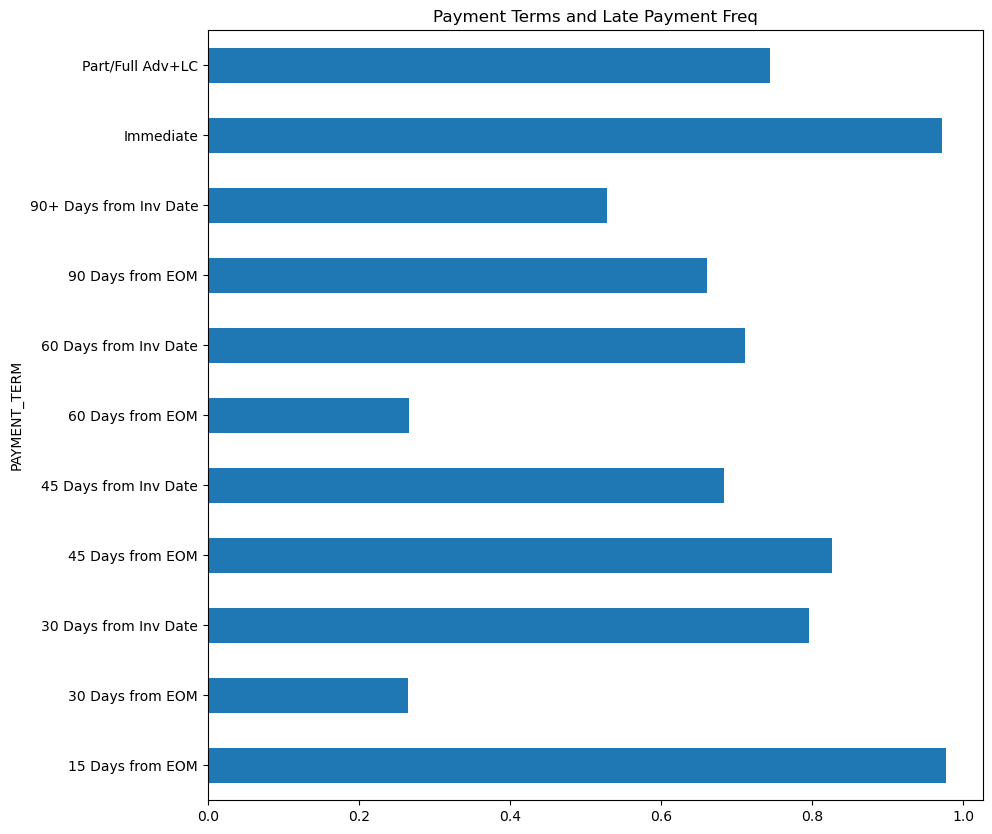

In [149]:
plt.figure(figsize=(10,10))
df_pay.groupby(['PAYMENT_TERM'])['LATE'].mean().plot.barh()
plt.title('Payment Terms and Late Payment Freq')

Text(0.5, 1.0, 'Payment Method and Late Frequency')

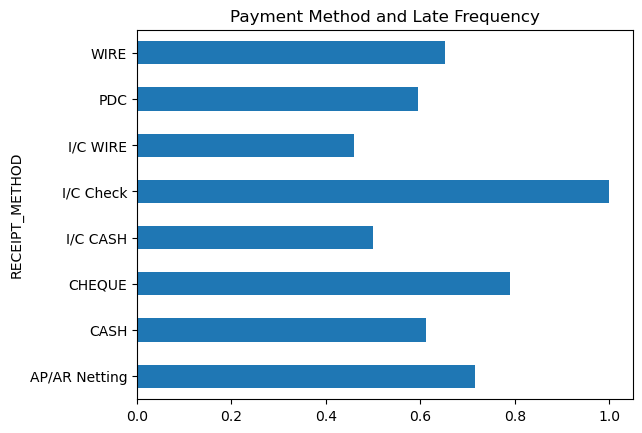

In [150]:
df_pay.groupby(['RECEIPT_METHOD'])['LATE'].mean().plot.barh()
plt.title("Payment Method and Late Frequency")

<AxesSubplot:>

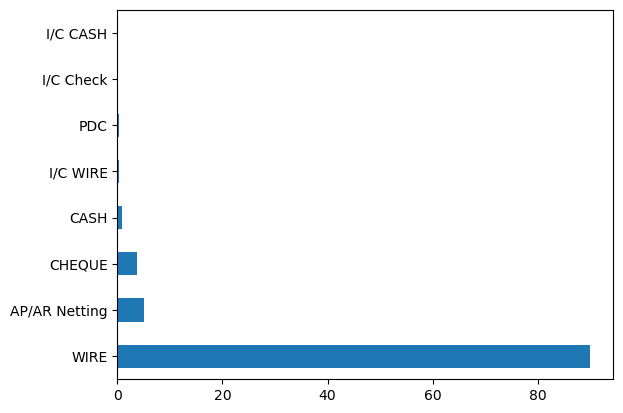

In [151]:
(df_pay['RECEIPT_METHOD'].value_counts(normalize=True)*100).plot.barh()

Text(0.5, 1.0, 'Payment Currency and Late Frequency')

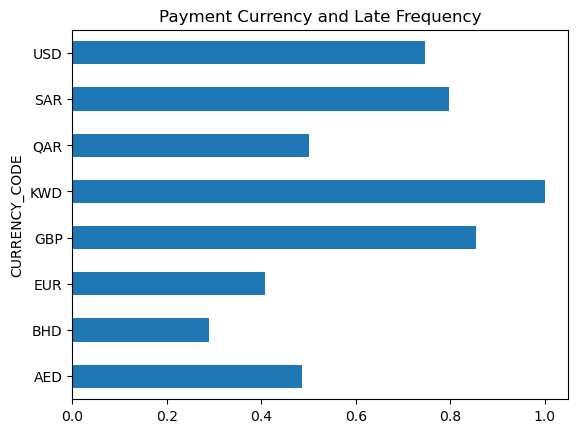

In [152]:
df_pay.groupby(['CURRENCY_CODE'])['LATE'].mean().plot.barh()
plt.title('Payment Currency and Late Frequency')

<AxesSubplot:ylabel='INVOICE_CURRENCY_CODE'>

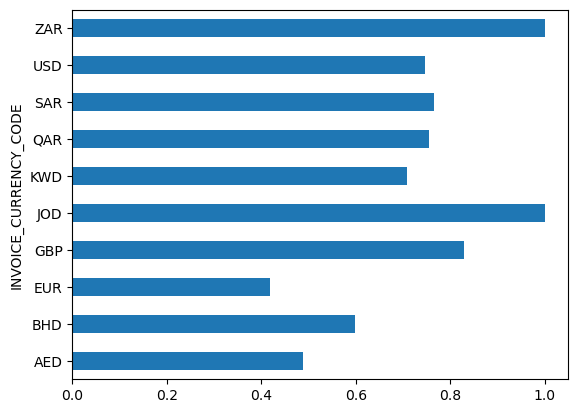

In [153]:
df_pay.groupby(['INVOICE_CURRENCY_CODE'])['LATE'].mean().plot.barh()

<AxesSubplot:>

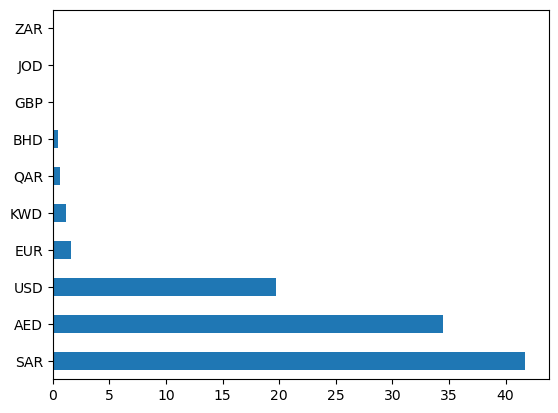

In [154]:
(df_pay['INVOICE_CURRENCY_CODE'].value_counts(normalize=True)*100).plot.barh()

Text(0.5, 1.0, 'Invoice Type Vs. Late Frequency')

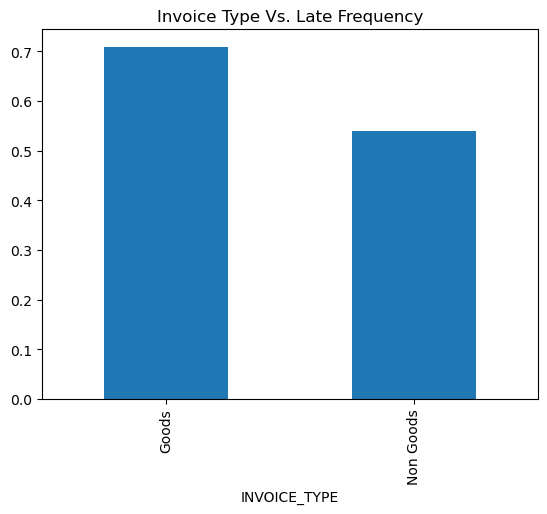

In [155]:
df_pay.groupby(['INVOICE_TYPE'])['LATE'].mean().plot.bar()
plt.title('Invoice Type Vs. Late Frequency')

<AxesSubplot:xlabel='INVOICE_CLASS'>

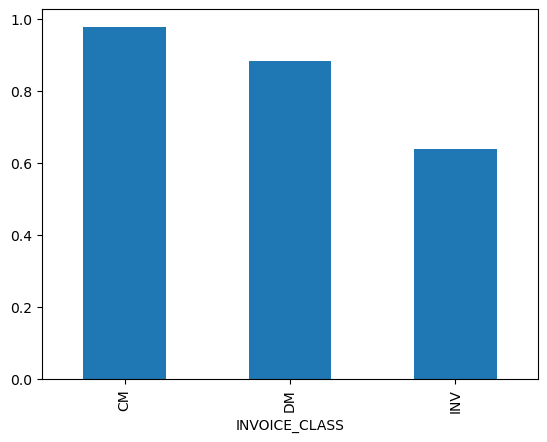

In [156]:
df_pay.groupby(['INVOICE_CLASS'])['LATE'].mean().plot.bar()

### Checking Top Customers

In [157]:
cust_freq=df_pay['CUSTOMER_NUMBER'].value_counts(normalize=True)

In [158]:
# 70% Of the Business Comes from top 30 Customer Numbers
cust_freq.cumsum().head(30)

1409     0.156473
15768    0.274132
2315     0.377524
7530     0.434821
1888     0.488710
3274     0.512291
3926     0.534998
34870    0.550754
1044     0.565350
3997     0.579062
2795     0.587972
3694     0.596851
7567     0.605559
15766    0.614161
23296    0.621943
4003     0.629544
3927     0.636539
1679     0.643203
1825     0.649016
20998    0.654743
4791     0.660268
3925     0.665740
3685     0.671149
2273     0.676227
15767    0.681134
3079     0.685861
3409     0.689843
48842    0.693814
38032    0.697540
2274     0.701138
Name: CUSTOMER_NUMBER, dtype: float64

In [159]:
top_30=cust_freq.head(30)

In [160]:
top_cust=pd.DataFrame(top_30)

In [161]:
top_cust.index

Int64Index([ 1409, 15768,  2315,  7530,  1888,  3274,  3926, 34870,  1044,
             3997,  2795,  3694,  7567, 15766, 23296,  4003,  3927,  1679,
             1825, 20998,  4791,  3925,  3685,  2273, 15767,  3079,  3409,
            48842, 38032,  2274],
           dtype='int64')

In [162]:
top_cust_df=df_pay[df_pay['CUSTOMER_NUMBER'].isin(top_cust.index)]

Text(0.5, 1.0, 'Customers with Late Payment Frequency')

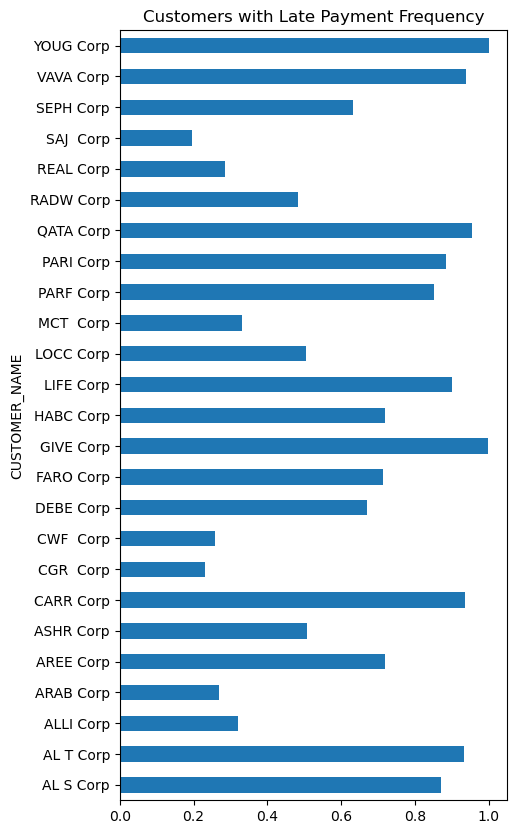

In [163]:
plt.figure(figsize=(5,10))
top_cust_df.groupby(['CUSTOMER_NAME'])['LATE'].mean().plot.barh()
plt.title('Customers with Late Payment Frequency')

Text(0.5, 1.0, 'Customers with Business in USD on Log Scale')

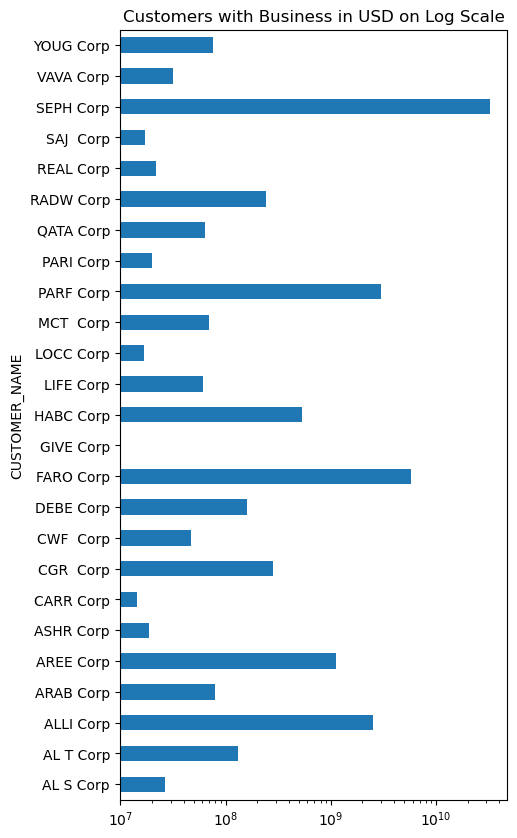

In [164]:
plt.figure(figsize=(5,10))
(top_cust_df.groupby(['CUSTOMER_NAME'])['USD Amount'].sum()).plot.barh()
plt.xscale('log')
plt.title('Customers with Business in USD on Log Scale')

# 2. Data cleaning

In [165]:
# Checking the missing values
df.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [166]:
# Checking number of unique values in each column
for i in df.columns:
    print(i, ':',len(df[i].unique()))

RECEIPT_METHOD : 8
CUSTOMER_NAME : 690
CUSTOMER_NUMBER : 1054
RECEIPT_DOC_NO : 74
RECEIPT_DATE : 170
CLASS : 1
CURRENCY_CODE : 8
Local Amount : 7752
USD Amount : 7820
INVOICE_ALLOCATED : 12986
INVOICE_CREATION_DATE : 1310
DUE_DATE : 1203
PAYMENT_TERM : 42
INVOICE_CLASS : 3
INVOICE_CURRENCY_CODE : 10
INVOICE_TYPE : 2


Looking at dataframe, missing values and unique values
- droppping RECEIPT_DOC_NO, 'RECEIPT_METHOD' as it has missing values and also does not seem to have any significance
- dropping CLASS as it is same for all the rows
- dropping 'CURRENCY_CODE', 'Local Amount' as we have INVOICE_CURRENCY_CODE, USD Amount available
- 'CUSTOMER_NUMBER', 'INVOICE_ALLOCATED' does not seems important

In [167]:
# dropping unnecessary columns
df1 = df.drop(['RECEIPT_METHOD', 'CUSTOMER_NUMBER','RECEIPT_DOC_NO','CLASS','CURRENCY_CODE', 
               'Local Amount','INVOICE_ALLOCATED'],axis=1)

In [168]:
# Converting date columns to date time format
df1[['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']] = df1[['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']].apply(pd.to_datetime)

In [169]:
# adding column with overdue days
df1['overdue_days'] = df1['RECEIPT_DATE']-df1['DUE_DATE']

In [170]:
# converting overdue_days to int
df1['overdue_days'] = df1['overdue_days'].dt.days

In [171]:
# adding target column, where overdue_days>0 is 1 (payment delayed) and overdue_days<=0 is 0 (payment not delayed)
df1['target'] = np.where(df1['overdue_days']>0,1,0)

In [172]:
# adding credit_period indicating number of days from invoice date to due date.
df1['credit_period'] = (df1['DUE_DATE']-df1['INVOICE_CREATION_DATE']).dt.days

In [173]:
df1

,CUSTOMER_NAME,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,overdue_days,target,credit_period
0,C EA Corp,2021-04-20,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,111,1,58
1,RADW Corp,2021-01-31,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,3,1,30
2,RADW Corp,2021-01-31,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,-29,0,30
3,FARO Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,1,30
4,RADW Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
93932,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,94,1,0
93933,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,94,1,0
93934,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,94,1,0
93935,NAMS Corp,2021-04-01,23574.33000,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,8,1,59


# 3. Clustering

### 3.1 Importing libraries for clustering

In [174]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 3.2 Data Preparation for clustering

In [175]:
# Getting average credit_period
grouped_df = df1.groupby('CUSTOMER_NAME')['credit_period'].mean()
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['CUSTOMER_NAME','credit_period_avg']
grouped_df

,CUSTOMER_NAME,credit_period_avg
0,3D D Corp,32.372093
1,6TH Corp,78.444444
2,A3 D Corp,26.600000
3,ABC Corp,90.000000
4,ABDU Corp,70.941406
...,...,...
685,YOUS Corp,75.000000
686,ZAHR Corp,95.785714
687,ZAIN Corp,32.119048
688,ZERO Corp,29.500000


In [176]:
# getting credit_period stadard deviation
stddev = df1.groupby('CUSTOMER_NAME')['credit_period'].std()
stddev = stddev.reset_index()
stddev.columns = ['CUSTOMER_NAME','credit_period_sd']
stddev

,CUSTOMER_NAME,credit_period_sd
0,3D D Corp,15.387431
1,6TH Corp,7.264832
2,A3 D Corp,2.190890
3,ABC Corp,0.000000
4,ABDU Corp,30.821187
...,...,...
685,YOUS Corp,35.032452
686,ZAHR Corp,17.703448
687,ZAIN Corp,17.081158
688,ZERO Corp,0.577350


In [177]:
# merging to get dataframe with CUSTOMER_NAME, credit_period_avg, credit_period_sd
grouped_df = pd.merge(grouped_df, stddev, on='CUSTOMER_NAME',how='inner')
grouped_df

,CUSTOMER_NAME,credit_period_avg,credit_period_sd
0,3D D Corp,32.372093,15.387431
1,6TH Corp,78.444444,7.264832
2,A3 D Corp,26.600000,2.190890
3,ABC Corp,90.000000,0.000000
4,ABDU Corp,70.941406,30.821187
...,...,...,...
685,YOUS Corp,75.000000,35.032452
686,ZAHR Corp,95.785714,17.703448
687,ZAIN Corp,32.119048,17.081158
688,ZERO Corp,29.500000,0.577350


In [178]:
# check statastical data for numerical variable 
grouped_df.describe()

,credit_period_avg,credit_period_sd
count,690.000000,604.000000
mean,38.570561,13.196848
std,32.516411,28.991577
min,-496.233405,0.000000
25%,27.627835,0.000000
50%,38.968085,8.061699
75%,55.927885,20.241019
max,120.000000,471.333073


<AxesSubplot:xlabel='credit_period_sd'>

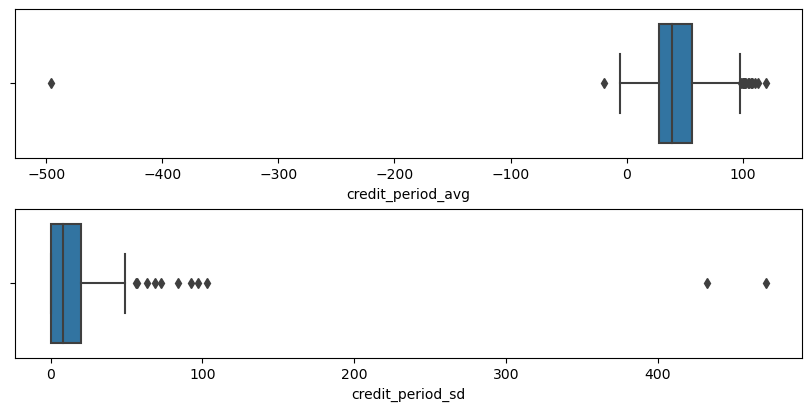

In [179]:
# Plot credit_period_avg, credit_period_sd to check for outliers
plt.figure(figsize=[8,4],layout='constrained')
plt.subplot(2,1,1)
sns.boxplot(grouped_df.credit_period_avg)
plt.subplot(2,1,2)
sns.boxplot(grouped_df.credit_period_sd)

In [180]:
# removing outliers
# outlier treatment for credit_period_avg
Q1 = grouped_df.credit_period_avg.quantile(0.05)
Q3 = grouped_df.credit_period_avg.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.credit_period_avg >= Q1 - 1.5*IQR) & (grouped_df.credit_period_avg <= Q3 + 1.5*IQR)]

# outlier treatment for payment_days_sd
Q1 = grouped_df.credit_period_sd.quantile(0.05)
Q3 = grouped_df.credit_period_sd.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.credit_period_sd >= Q1 - 1.5*IQR) & (grouped_df.credit_period_sd <= Q3 + 1.5*IQR)]


In [181]:
# Keeping numerical variables for scaling
pd_df = grouped_df[['credit_period_avg', 'credit_period_sd']]

#instantiate scaling
scaler = StandardScaler()
pd_df_scaled = scaler.fit_transform(pd_df)


In [182]:
# Checking shape of scaled dataframe
pd_df_scaled.shape

(599, 2)

In [183]:
pd_df_scaled = pd.DataFrame(pd_df_scaled)

In [184]:
pd_df_scaled.columns = ['credit_period_avg', 'credit_period_sd']
pd_df_scaled

,credit_period_avg,credit_period_sd
0,-0.314178,0.319684
1,1.561517,-0.317138
2,-0.549171,-0.714941
3,2.031966,-0.886709
4,1.256053,1.529710
...,...,...
594,1.421287,1.859878
595,2.267513,0.501263
596,-0.324480,0.452475
597,-0.431107,-0.841444


### 3.3 Appying K Means clusters

In [185]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(pd_df_scaled)

KMeans(max_iter=100, n_clusters=4)

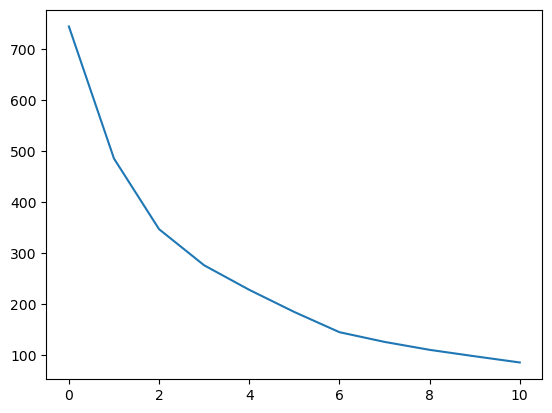

In [186]:
# elbow-curve
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=100)
    kmeans.fit(pd_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

#### Silhouette analysis

In [187]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters,max_iter = 100)
    kmeans.fit(pd_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(pd_df_scaled, cluster_labels)
    print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.39279072910766427
For n_clusters=3, the silhouette score is 0.4128067589567064
For n_clusters=4, the silhouette score is 0.4631100442617391
For n_clusters=5, the silhouette score is 0.4696898240338824
For n_clusters=6, the silhouette score is 0.44936314769974417
For n_clusters=7, the silhouette score is 0.44524181602018026
For n_clusters=8, the silhouette score is 0.4811838875752028
For n_clusters=9, the silhouette score is 0.48668007609627817
For n_clusters=10, the silhouette score is 0.5040890275599293
For n_clusters=11, the silhouette score is 0.5100820770859744
For n_clusters=12, the silhouette score is 0.5301637418664311


In [188]:
# We will go with k=5 as the score is close to 0.47. There are score greater than this as well for clusters 8 to 12, 
# however, too many cluster will loose its importance.
kmeans = KMeans(n_clusters=5,max_iter=100)
kmeans.fit(pd_df_scaled)

KMeans(max_iter=100, n_clusters=5)

In [189]:
# assigning cluster id to customers
grouped_df['cluster_id'] = kmeans.labels_
grouped_df

,CUSTOMER_NAME,credit_period_avg,credit_period_sd,cluster_id
0,3D D Corp,32.372093,15.387431,1
1,6TH Corp,78.444444,7.264832,3
2,A3 D Corp,26.600000,2.190890,0
3,ABC Corp,90.000000,0.000000,3
4,ABDU Corp,70.941406,30.821187,1
...,...,...,...,...
685,YOUS Corp,75.000000,35.032452,4
686,ZAHR Corp,95.785714,17.703448,3
687,ZAIN Corp,32.119048,17.081158,1
688,ZERO Corp,29.500000,0.577350,0


#### Plotting Centroids

In [190]:
centroids = kmeans.cluster_centers_

In [191]:
orig_centroids = scaler.inverse_transform(centroids)

Text(0.5, 1.0, 'K-means Clustering with Centroids (Original Scale)')

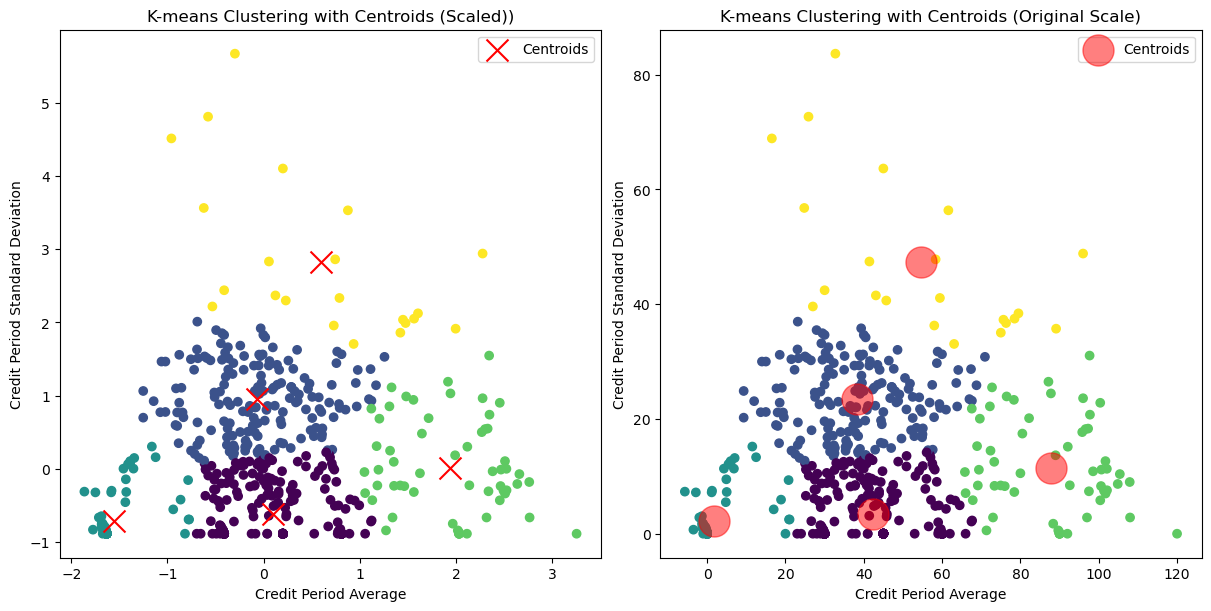

In [192]:
# plotting the centroids

plt.figure(figsize=[12,6], layout='constrained')

plt.subplot(1,2,1)
plt.scatter(pd_df_scaled['credit_period_avg'], pd_df_scaled['credit_period_sd'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=250, c='red', label='Centroids')
plt.xlabel('Credit Period Average')
plt.ylabel('Credit Period Standard Deviation')
plt.legend()
plt.title('K-means Clustering with Centroids (Scaled))')

plt.subplot(1,2,2)
plt.scatter(grouped_df['credit_period_avg'], grouped_df['credit_period_sd'], c=kmeans.labels_, cmap='viridis')
plt.scatter(orig_centroids[:, 0], orig_centroids[:, 1], s=500, c='red', label='Centroids', alpha=0.5)
plt.xlabel('Credit Period Average')
plt.ylabel('Credit Period Standard Deviation')
plt.legend()
plt.title('K-means Clustering with Centroids (Original Scale)')


### Customer segmentation:

- There are clear 5 clusters of customers having different avarage payment days
- Most of the customers are offered between 20 to 60 days of payment terms on an average.(Blue, purple and yellow cluster)
- When credit period is under 20 days on average, the variability in credit period is very less. (peacock blue cluster)
- When credit period is more than 60 days on average, there is relatively moderage variability in the offered credit period (green cluster)
- The variability is highest when credit period is between 20 to 60 days

# 4. Checking correlations of Numerical columns

In [193]:
num_col = ['USD Amount', 'overdue_days','target', 'credit_period']

<AxesSubplot:>

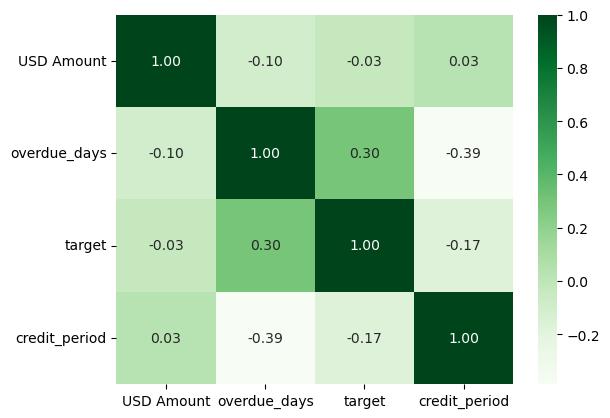

In [194]:
num_col_corr = df1[num_col].corr()
sns.heatmap(num_col_corr, fmt='.2f', annot=True, annot_kws={'size':10},cmap='Greens')

# 5. Feature Engineering

In [195]:
df1.head()

,CUSTOMER_NAME,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,overdue_days,target,credit_period
0,C EA Corp,2021-04-20,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,111,1,58
1,RADW Corp,2021-01-31,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,3,1,30
2,RADW Corp,2021-01-31,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,-29,0,30
3,FARO Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,1,30
4,RADW Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,1,30


In [196]:
df1.columns

Index(['CUSTOMER_NAME', 'RECEIPT_DATE', 'USD Amount', 'INVOICE_CREATION_DATE',
       'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'overdue_days', 'target', 'credit_period'],
      dtype='object')

In [197]:
# One Hot Encoding
ohe_cols = ['PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE']
df2=pd.get_dummies(df1,columns=ohe_cols,drop_first=True)

In [198]:
df2

,CUSTOMER_NAME,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_TYPE,overdue_days,target,credit_period,PAYMENT_TERM_120 Days from EOM,PAYMENT_TERM_120 Days from Inv Date,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_15 Days from Inv Date,PAYMENT_TERM_180 DAYS FROM INV DATE,PAYMENT_TERM_195 days from Invoice Date,PAYMENT_TERM_25 DAYS FROM EOM,"PAYMENT_TERM_25% ADVANCE, 75% 30 DAYS FROM INVOICE DATE",PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_30% advance 70% after 30 days from invoice date,PAYMENT_TERM_30% advance 70% after 60 days from invoice date,PAYMENT_TERM_365 DAYS FROM INVOICE DATE,PAYMENT_TERM_40 DAYS FROM EOM,PAYMENT_TERM_45 DAYS + EOM,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_50% ADV 50% 30 Days,PAYMENT_TERM_50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT,PAYMENT_TERM_50% Advance 50% INVDATE+60 DAYS,PAYMENT_TERM_50% at 30 days and 50% at 60 days,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_7 Days from EOM,PAYMENT_TERM_7 Days from Inv Date,PAYMENT_TERM_75 Days from EOM,PAYMENT_TERM_75 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Advance with discount,PAYMENT_TERM_Cash Against Document at sight,PAYMENT_TERM_Cash on Delivery,PAYMENT_TERM_EOM,PAYMENT_TERM_Immediate,PAYMENT_TERM_Immediate Payment,PAYMENT_TERM_LC at 60 days,PAYMENT_TERM_LC at 60 days from FCR/AWB/BL date,PAYMENT_TERM_LC at 90 days,PAYMENT_TERM_LCSight,PAYMENT_TERM_On Consignment,PAYMENT_TERM_Standby LC at 30 days,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,C EA Corp,2021-04-20,101018.63040,2020-11-02,2020-12-30,Non Goods,111,1,58,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,RADW Corp,2021-01-31,48990.21133,2020-12-29,2021-01-28,Non Goods,3,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,RADW Corp,2021-01-31,41991.60971,2021-01-30,2021-03-01,Non Goods,-29,0,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,FARO Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,Non Goods,17,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,RADW Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,Non Goods,17,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Goods,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93933,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Goods,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93934,PEAR Corp,2021-04-01,59914.50000,2020-12-28,2020-12-28,Goods,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93935,NAMS Corp,2021-04-01,23574.33000,2021-01-24,2021-03-24,Goods,8,1,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# 6. Checkig Class imbalance and Data prep for Model building

### 6.1 Checking class imbalance

In [199]:
# Checking classs imbalance by checking % of delayed and not delayed from target column
df2['target'].value_counts(normalize=True)*100

1    65.978262
0    34.021738
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

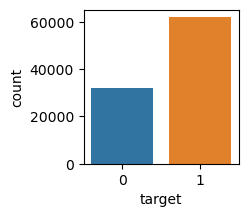

In [200]:
plt.figure(figsize=[2,2])
sns.countplot('target', data=df2)

The dataset is moderately imbalanced with approx. 66% delayed and 34% not delayed.

### 6.2 Data Preparation for building model

In [201]:
# dropping dates columns and overdue_days as it is not useful for working out on model

df3 = df2.drop(['CUSTOMER_NAME','RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE','INVOICE_TYPE','overdue_days'],axis=1)

In [202]:
df3.shape

(93937, 55)

In [203]:
df3.head()

,USD Amount,target,credit_period,PAYMENT_TERM_120 Days from EOM,PAYMENT_TERM_120 Days from Inv Date,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_15 Days from Inv Date,PAYMENT_TERM_180 DAYS FROM INV DATE,PAYMENT_TERM_195 days from Invoice Date,PAYMENT_TERM_25 DAYS FROM EOM,"PAYMENT_TERM_25% ADVANCE, 75% 30 DAYS FROM INVOICE DATE",PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_30% advance 70% after 30 days from invoice date,PAYMENT_TERM_30% advance 70% after 60 days from invoice date,PAYMENT_TERM_365 DAYS FROM INVOICE DATE,PAYMENT_TERM_40 DAYS FROM EOM,PAYMENT_TERM_45 DAYS + EOM,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_50% ADV 50% 30 Days,PAYMENT_TERM_50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT,PAYMENT_TERM_50% Advance 50% INVDATE+60 DAYS,PAYMENT_TERM_50% at 30 days and 50% at 60 days,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_7 Days from EOM,PAYMENT_TERM_7 Days from Inv Date,PAYMENT_TERM_75 Days from EOM,PAYMENT_TERM_75 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Advance with discount,PAYMENT_TERM_Cash Against Document at sight,PAYMENT_TERM_Cash on Delivery,PAYMENT_TERM_EOM,PAYMENT_TERM_Immediate,PAYMENT_TERM_Immediate Payment,PAYMENT_TERM_LC at 60 days,PAYMENT_TERM_LC at 60 days from FCR/AWB/BL date,PAYMENT_TERM_LC at 90 days,PAYMENT_TERM_LCSight,PAYMENT_TERM_On Consignment,PAYMENT_TERM_Standby LC at 30 days,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.63040,1,58,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,48990.21133,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,41991.60971,0,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,41991.60971,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,41991.60971,1,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### 6.3 Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
y = df3.target
X = df3.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

### 6.4 Feature Selection

In [206]:
# run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns

for feature in zip(feats, rf.feature_importances_):
    print(feature)


('USD Amount', 0.5048787495024918)
('credit_period', 0.18829900374363845)
('PAYMENT_TERM_120 Days from EOM', 1.2074573383505414e-05)
('PAYMENT_TERM_120 Days from Inv Date', 0.00018208305324708498)
('PAYMENT_TERM_15 Days from EOM', 0.02267900254766974)
('PAYMENT_TERM_15 Days from Inv Date', 0.00024666246751098644)
('PAYMENT_TERM_180 DAYS FROM INV DATE', 0.0)
('PAYMENT_TERM_195 days from Invoice Date', 0.00016604242940085884)
('PAYMENT_TERM_25 DAYS FROM EOM', 0.001693785357406473)
('PAYMENT_TERM_25% ADVANCE, 75% 30 DAYS FROM INVOICE DATE', 8.173043517959194e-06)
('PAYMENT_TERM_30 Days from EOM', 0.08232427889574154)
('PAYMENT_TERM_30 Days from Inv Date', 0.010074043262098641)
('PAYMENT_TERM_30% advance 70% after 30 days from invoice date', 2.9314047319129884e-05)
('PAYMENT_TERM_30% advance 70% after 60 days from invoice date', 9.078207052396319e-05)
('PAYMENT_TERM_365 DAYS FROM INVOICE DATE', 4.0397304772194955e-05)
('PAYMENT_TERM_40 DAYS FROM EOM', 9.797102263225724e-06)
('PAYMENT_TERM_

In [207]:
feat_low2high = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=True)
feat_low2high

PAYMENT_TERM_180 DAYS FROM INV DATE                                     0.000000e+00
PAYMENT_TERM_7 Days from EOM                                            7.583698e-07
PAYMENT_TERM_Advance with discount                                      1.559752e-06
PAYMENT_TERM_Cash Against Document at sight                             3.721854e-06
PAYMENT_TERM_50% at 30 days and 50% at 60 days                          6.743115e-06
PAYMENT_TERM_25% ADVANCE, 75% 30 DAYS FROM INVOICE DATE                 8.173044e-06
PAYMENT_TERM_40 DAYS FROM EOM                                           9.797102e-06
PAYMENT_TERM_Standby LC at 30 days                                      1.012661e-05
PAYMENT_TERM_120 Days from EOM                                          1.207457e-05
PAYMENT_TERM_30% advance 70% after 30 days from invoice date            2.931405e-05
PAYMENT_TERM_7 Days from Inv Date                                       3.855308e-05
PAYMENT_TERM_365 DAYS FROM INVOICE DATE                          

In [208]:
# getting top 10 features
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.nlargest(10)

USD Amount                            0.504879
credit_period                         0.188299
PAYMENT_TERM_30 Days from EOM         0.082324
PAYMENT_TERM_60 Days from EOM         0.069953
INVOICE_CURRENCY_CODE_SAR             0.027840
PAYMENT_TERM_15 Days from EOM         0.022679
PAYMENT_TERM_Immediate Payment        0.013128
INVOICE_CURRENCY_CODE_USD             0.012698
PAYMENT_TERM_60 Days from Inv Date    0.012665
PAYMENT_TERM_30 Days from Inv Date    0.010074
dtype: float64

In [209]:
# Making list of top features which are >0.02, other can be dropped as it does not contribute much.
top_feat=feature_imp.nlargest(6).index.to_list()
top_feat

['USD Amount',
 'credit_period',
 'PAYMENT_TERM_30 Days from EOM',
 'PAYMENT_TERM_60 Days from EOM',
 'INVOICE_CURRENCY_CODE_SAR',
 'PAYMENT_TERM_15 Days from EOM']

In [210]:
# getting dataframe with top 15 features and target variable
df4 = df3[top_feat+ ['target']]

# 7. Handling class imbalance
We will try different class imbalance techniques and different algorithems to evaluate the model. For evaluation, we will focus on Recall as we want to improve on catching the customer who are likely to delay payment and early engagement with customer will help.

In [211]:
# Train-Test split before trying various algorithms and class imbalance techniques
y = df4.target
X = df4.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

### 7.1 Logistic regression

#### Logistic Regression - Base 

In [212]:
# Logistic Regression - Base 
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [213]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [214]:
y_pred = lreg.predict(X_test)

In [215]:
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9588
           1       0.66      0.99      0.79     18594

    accuracy                           0.66     28182
   macro avg       0.33      0.50      0.40     28182
weighted avg       0.43      0.66      0.52     28182


 confussion matrix:
 [[    0  9588]
 [  119 18475]]


#### Logistic Regression - Random Undersampling 

In [216]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

44742

In [217]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 22371), (1, 22371)]


In [218]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [219]:
print ('\n clasification report (Random undersampling):\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix (Random undersampling):\n',confusion_matrix(y_test, y_pred_us))


 clasification report (Random undersampling):
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      9588
           1       1.00      0.01      0.02     18594

    accuracy                           0.35     28182
   macro avg       0.67      0.50      0.26     28182
weighted avg       0.78      0.35      0.19     28182


 confussion matrix (Random undersampling):
 [[ 9588     0]
 [18419   175]]


#### Logistic Regression - Tomek Links 

In [220]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

65355

In [221]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 22371), (1, 42984)]


In [222]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [223]:
print ('\n clasification report (Tomek Links):\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix (Tomek Links):\n',confusion_matrix(y_test, y_pred_tomek))


 clasification report (Tomek Links):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9588
           1       0.66      0.99      0.79     18594

    accuracy                           0.66     28182
   macro avg       0.33      0.50      0.40     28182
weighted avg       0.43      0.66      0.52     28182


 confussion matrix (Tomek Links):
 [[    0  9588]
 [  119 18475]]


#### Logistic Regression - Random Oversampling 

In [224]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

86768

In [225]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 43384), (1, 43384)]


In [226]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [227]:
print ('\n clasification report (Random OverSampling):\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix (Random OverSampling):\n',confusion_matrix(y_test, y_pred_os))


 clasification report (Random OverSampling):
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      9588
           1       1.00      0.01      0.02     18594

    accuracy                           0.35     28182
   macro avg       0.67      0.50      0.26     28182
weighted avg       0.78      0.35      0.19     28182


 confussion matrix (Random OverSampling):
 [[ 9588     0]
 [18419   175]]


#### Logistic Regression - SMOTE 

In [228]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

86768

In [229]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 43384), (1, 43384)]


In [230]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [231]:
print ('\n clasification report (SMOTE):\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix (SMOTE):\n',confusion_matrix(y_test, y_pred_smt))


 clasification report (SMOTE):
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      9588
           1       1.00      0.01      0.02     18594

    accuracy                           0.35     28182
   macro avg       0.67      0.50      0.26     28182
weighted avg       0.78      0.35      0.19     28182


 confussion matrix (SMOTE):
 [[ 9588     0]
 [18419   175]]


#### Logistic Regression - ADASYN 

In [232]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

88021

In [233]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 44637), (1, 43384)]


In [234]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [235]:
print ('\n clasification report (ADASYN):\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix (ADASYN):\n',confusion_matrix(y_test, y_pred_ada))


 clasification report (ADASYN):
               precision    recall  f1-score   support

           0       0.39      0.95      0.55      9588
           1       0.90      0.23      0.36     18594

    accuracy                           0.47     28182
   macro avg       0.64      0.59      0.46     28182
weighted avg       0.73      0.47      0.43     28182


 confussion matrix (ADASYN):
 [[ 9119   469]
 [14398  4196]]


#### Logistic Regression - SMOTE+TOMEK 

In [236]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

85946

In [237]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 42973), (1, 42973)]


In [238]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [239]:
print ('\n clasification report (SMOTE+TOMEK):\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix (SMOTE+TOMEK):\n',confusion_matrix(y_test, y_pred_smt_tmk))


 clasification report (SMOTE+TOMEK):
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      9588
           1       1.00      0.01      0.02     18594

    accuracy                           0.35     28182
   macro avg       0.67      0.50      0.26     28182
weighted avg       0.78      0.35      0.19     28182


 confussion matrix (SMOTE+TOMEK):
 [[ 9588     0]
 [18419   175]]


# 7.2 Random Forest

#### Random Forest - Base

In [240]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [241]:
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))


 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      9588
           1       0.89      0.94      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.88      0.86      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix:
 [[ 7532  2056]
 [ 1187 17407]]


In [242]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [243]:
print ('\n clasification report (Random UnderSampling):\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix (Random UnderSampling):\n',confusion_matrix(y_test, y_pred_rf_us))


 clasification report (Random UnderSampling):
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      9588
           1       0.92      0.87      0.90     18594

    accuracy                           0.87     28182
   macro avg       0.85      0.87      0.86     28182
weighted avg       0.87      0.87      0.87     28182


 confussion matrix (Random UnderSampling):
 [[ 8239  1349]
 [ 2402 16192]]


#### Random Forest - Tomek Links

In [244]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [245]:
print ('\n clasification report (Tomek Links):\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix (Tomek Links):\n',confusion_matrix(y_test, y_pred_rf_tomek))


 clasification report (Tomek Links):
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      9588
           1       0.90      0.93      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.88      0.86      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix (Tomek Links):
 [[ 7598  1990]
 [ 1289 17305]]


In [246]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [247]:
print ('\n clasification report (Random Over-Sampling):\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix (Random Over-Sampling):\n',confusion_matrix(y_test, y_pred_rf_os))


 clasification report (Random Over-Sampling):
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      9588
           1       0.92      0.90      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.86      0.87      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix (Random Over-Sampling):
 [[ 8048  1540]
 [ 1857 16737]]


#### Random Forest - SMOTE

In [248]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [249]:
print ('\n clasification report (SMOTE):\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix (SMOTE):\n',confusion_matrix(y_test, y_pred_rf_smt))


 clasification report (SMOTE):
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      9588
           1       0.92      0.90      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.86      0.87      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix (SMOTE):
 [[ 8109  1479]
 [ 1943 16651]]


#### Random Forest - ADASYN

In [250]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [251]:
print ('\n clasification report (ADASYN):\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix (ADASYN):\n',confusion_matrix(y_test, y_pred_rf_ada))


 clasification report (ADASYN):
               precision    recall  f1-score   support

           0       0.73      0.90      0.80      9588
           1       0.94      0.82      0.88     18594

    accuracy                           0.85     28182
   macro avg       0.83      0.86      0.84     28182
weighted avg       0.87      0.85      0.85     28182


 confussion matrix (ADASYN):
 [[ 8630   958]
 [ 3269 15325]]


#### Random Forest - SMOTE+TOMEK

In [252]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [253]:
print ('\n clasification report (SMOTE+TOMEK):\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix (SMOTE+TOMEK):\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))


 clasification report (SMOTE+TOMEK):
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      9588
           1       0.92      0.89      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.86      0.87      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix (SMOTE+TOMEK):
 [[ 8162  1426]
 [ 2013 16581]]


### Summary of different algorithm and class imbalance technique

												
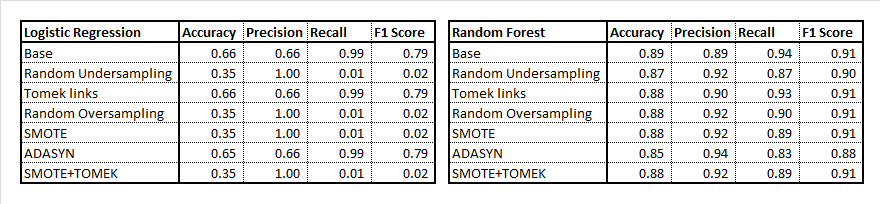

- Here, Base (without implementing class imbalance technique) and Tomek links gives best result among all other class imbalance techniques. 
- However, Random Forest performs much better with high Accuracy, Precision, Recall and F1 Score. Logistic Regression has better Recall than Random Forest but much lower Accuracy and Precision.
- So, we will go with Random Forest without implementing any class imbalance technique. 
- We have also seen earlier that the dataset in not highly skewed with 64% delayed payments and 36% not delayed.

# 8. Model Building

### 8.1 RandomForest Model

In [254]:
# Instantiate RandomForest
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [255]:
# Fitting train data 
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [256]:
# Predicting y_train data from RandomForest model
y_train_pred = rf.predict(X_train)

In [257]:
# checking accuracy of train data
accuracy_score(y_train, y_train_pred)

0.942650748992472

In [258]:
# Predicting y_test data from RandomForest model
y_test_pred = rf.predict(X_test)

In [259]:
# Checking accuracy of Test data
accuracy_score(y_test, y_test_pred)

0.8848200979348521

In [260]:
# Getting evaluation metric and confusion matrix
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      9588
           1       0.89      0.94      0.91     18594

    accuracy                           0.88     28182
   macro avg       0.88      0.86      0.87     28182
weighted avg       0.88      0.88      0.88     28182


 confussion matrix:
 [[ 7544  2044]
 [ 1202 17392]]


### 8.2 Hyperparameter Tuning

#### GridSearchCV

In [261]:
# importing library for finding optimal parameters
from sklearn.model_selection import GridSearchCV

In [262]:
# Instantiating RandomForest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [263]:
# Defining different values for the hyper parameters for searching best combination
hyper_params = {'max_depth': [10, 15, 20],
                'max_features': [2,4,6],
                'min_samples_leaf': [20, 50, 100],
                'n_estimators': [25, 50, 75]
               }

In [264]:
# Instantiating 4 fold GridSearch for given hyperparameters
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True)

In [265]:
# Fitting different values on Train data
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [25, 50, 75]},
             return_train_score=True, verbose=1)

In [266]:
# Getting best score
model_cv.best_score_

0.8465364189588261

In [267]:
# Getting best combination of parameters 
model_cv.best_estimator_

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [268]:
rf_best_cv = model_cv.best_estimator_

In [269]:
# predicting test data 
y_test_pred = rf_best_cv.predict(X_test)

In [270]:
# Getting evaluation metric and confusion matrix
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76      9588
           1       0.85      0.93      0.89     18594

    accuracy                           0.85     28182
   macro avg       0.84      0.81      0.82     28182
weighted avg       0.85      0.85      0.84     28182


 confussion matrix:
 [[ 6595  2993]
 [ 1282 17312]]


#### Fine tuning 

In [271]:
# Fine tuning of parameters
hyper_params = {'max_depth': [15, 20, 25],
                'max_features': [6],
                'min_samples_leaf': [20, 25, 30],
                'n_estimators': [50,75]
               }

In [272]:
# Instantiating 4 fold GridSearch for fine tuning of hyperparameters
model_cv2 = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True)

In [273]:
# Fitting different values on Train data
model_cv2.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_features': [6],
                         'min_samples_leaf': [20, 25, 30],
                         'n_estimators': [50, 75]},
             return_train_score=True, verbose=1)

In [274]:
# Getting the best score 
model_cv2.best_score_

0.8472207634545588

In [275]:
# Getting the best parameters after fine tuning
model_cv2.best_estimator_

RandomForestClassifier(max_depth=25, max_features=6, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

### 8.3 Finalizing the model

In [276]:
# Selecting best parameters out of model_cv and model_cv2
rf_best = model_cv2.best_estimator_

In [277]:
rf_best

RandomForestClassifier(max_depth=25, max_features=6, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [278]:
# Predicting Test data based on parameters obtained from fine tuning
y_test_pred = rf_best.predict(X_test)

In [279]:
# Checking the evaluation metrics for rf_best
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      9588
           1       0.86      0.93      0.89     18594

    accuracy                           0.85     28182
   macro avg       0.85      0.81      0.82     28182
weighted avg       0.85      0.85      0.85     28182


 confussion matrix:
 [[ 6665  2923]
 [ 1319 17275]]


- We will finalize the model `rf_best` for further use, as it is giving very high accuracy, precision, recall and f1-score. 
- Out of these, recall is very high, which shows that model predicts very high proportion of delayed payments

# 9. Applying model on Open_Invoice

### 9.1 Reading data, data cleaning and data preparation

In [287]:
oi = pd.read_csv('Open_Invoice_data.csv',encoding='latin1')

In [288]:
oi.head()

,ï»¿AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04/04/22 1:07,3rd Party,GIVE Corp,49144.0,1.0021E+11,21/12/21,Immediate,21/12/21,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04/04/22 1:07,Related Party,AL J Corp,23152.0,1.0022E+11,01/02/22,30 Days from Inv Date,03/03/22,USD,"2,000",INVOICE,33,"2,000",02/01/22 14:09
2,04/04/22 1:07,Related Party,AL J Corp,23152.0,1.0022E+11,24/03/22,30 Days from Inv Date,23/04/22,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04/04/22 1:07,Related Party,AL R Corp,23312.0,1.0022E+11,04/01/22,15 Days from Inv Date,19/01/22,AED,"2,415",INVOICE,76,"2,415",01/05/22 11:49
4,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,03/03/22,30 Days from EOM,30/04/22,AED,"3,800",INVOICE,-25,"3,800",03/03/22 22:30


In [282]:
oi.isna().sum()

ï»¿AS_OF_DATE           0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [283]:
oi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿AS_OF_DATE         88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [284]:
# Removing rows for which prediction is not required
oi_pred=oi[oi['AGE']<=0]

In [285]:
oi_pred

,ï»¿AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
2,04/04/22 1:07,Related Party,AL J Corp,23152.0,1.0022E+11,24/03/22,30 Days from Inv Date,23/04/22,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
4,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,03/03/22,30 Days from EOM,30/04/22,AED,"3,800",INVOICE,-25,"3,800",03/03/22 22:30
5,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,03/03/22,30 Days from EOM,30/04/22,AED,"1,264",INVOICE,-25,"1,264",03/03/22 22:30
6,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,15/03/22,30 Days from EOM,30/04/22,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06
7,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,15/03/22,30 Days from EOM,30/04/22,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,04/04/22 1:07,3rd Party,MIDD Corp,20867.0,1.6522E+11,30/03/22,60 Days from Inv Date,29/05/22,USD,"3,435",INVOICE,-54,"3,435",3/30/2022 11:10
88186,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,07/03/22,60 Days from Inv Date,06/05/22,USD,"1,14,039",INVOICE,-31,"1,14,039",03/07/22 9:58
88187,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,17/03/22,60 Days from Inv Date,16/05/22,USD,"32,138",INVOICE,-41,"32,138",3/17/2022 8:21
88188,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,18/03/22,60 Days from Inv Date,17/05/22,USD,"26,764",INVOICE,-42,"26,764",3/18/2022 10:48


In [289]:
# Removing unnecessary columns
oi1 = oi_pred.drop(['AS_OF_DATE', 'Customer Type', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Local Amount'],axis=1)

In [290]:
# Converting USD Amount to float
oi1['USD Amount'] = oi1['USD Amount'].str.replace(',', '').astype(float)

In [291]:
# Converting date columns to date time format
oi1[['Due Date','INV_CREATION_DATE']] = oi1[['Due Date','INV_CREATION_DATE']].apply(pd.to_datetime)

In [292]:
# adding credit_period indicating number of days from invoice date to due date.
oi1['credit_period'] = (oi1['Due Date']-oi1['INV_CREATION_DATE']).dt.days

In [293]:
oi1

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,credit_period
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000.0,2022-03-24 17:46:00,29
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800.0,2022-03-03 22:30:00,57
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264.0,2022-03-03 22:30:00,57
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858.0,2022-03-15 19:06:00,45
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873.0,2022-03-15 19:06:00,45
...,...,...,...,...,...,...,...,...,...
88172,MIDD Corp,60 Days from Inv Date,2022-05-29,USD,INVOICE,-54,3435.0,2022-03-30 11:10:00,59
88186,SAUD Corp,60 Days from Inv Date,2022-06-05,USD,INVOICE,-31,114039.0,2022-03-07 09:58:00,89
88187,SAUD Corp,60 Days from Inv Date,2022-05-16,USD,INVOICE,-41,32138.0,2022-03-17 08:21:00,59
88188,SAUD Corp,60 Days from Inv Date,2022-05-17,USD,INVOICE,-42,26764.0,2022-03-18 10:48:00,59


#### Renaming columns to match with feature of model

In [294]:
oi2 = oi1.rename(columns={'Customer_Name':'CUSTOMER_NAME','Payment Term':'PAYMENT_TERM','Due Date':'DUE_DATE', 
                         'Transaction Currency':'INVOICE_CURRENCY_CODE','INV_CREATION_DATE':'INVOICE_CREATION_DATE',
                          'Transaction Class':'INVOICE_CLASS'})

In [295]:
oi2

,CUSTOMER_NAME,PAYMENT_TERM,DUE_DATE,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,INVOICE_CREATION_DATE,credit_period
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000.0,2022-03-24 17:46:00,29
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800.0,2022-03-03 22:30:00,57
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264.0,2022-03-03 22:30:00,57
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858.0,2022-03-15 19:06:00,45
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873.0,2022-03-15 19:06:00,45
...,...,...,...,...,...,...,...,...,...
88172,MIDD Corp,60 Days from Inv Date,2022-05-29,USD,INVOICE,-54,3435.0,2022-03-30 11:10:00,59
88186,SAUD Corp,60 Days from Inv Date,2022-06-05,USD,INVOICE,-31,114039.0,2022-03-07 09:58:00,89
88187,SAUD Corp,60 Days from Inv Date,2022-05-16,USD,INVOICE,-41,32138.0,2022-03-17 08:21:00,59
88188,SAUD Corp,60 Days from Inv Date,2022-05-17,USD,INVOICE,-42,26764.0,2022-03-18 10:48:00,59


In [296]:
# One Hot Encoding
ohe_cols = ['PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE']
oi3=pd.get_dummies(oi2,columns=ohe_cols,drop_first=True)

In [297]:
oi3

,CUSTOMER_NAME,DUE_DATE,AGE,USD Amount,INVOICE_CREATION_DATE,credit_period,PAYMENT_TERM_120 Days from Inv Date,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_15 Days from Inv Date,PAYMENT_TERM_180 DAYS FROM INV DATE,PAYMENT_TERM_25 DAYS FROM EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_30% advance 70% after 60 days from invoice date,PAYMENT_TERM_365 DAYS FROM INVOICE DATE,PAYMENT_TERM_40 DAYS FROM EOM,PAYMENT_TERM_45 DAYS + EOM,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_50% ADV 50% 30 Days,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_70 days from Invoice Date,PAYMENT_TERM_75 Days from EOM,PAYMENT_TERM_75 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_LC at 60 days,INVOICE_CLASS_INVOICE,INVOICE_CLASS_PAYMENT,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
2,AL J Corp,2022-04-23,-18,2000.0,2022-03-24 17:46:00,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800.0,2022-03-03 22:30:00,57,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,-25,1264.0,2022-03-03 22:30:00,57,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,ALLI Corp,2022-04-30,-25,25858.0,2022-03-15 19:06:00,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,ALLI Corp,2022-04-30,-25,39873.0,2022-03-15 19:06:00,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,MIDD Corp,2022-05-29,-54,3435.0,2022-03-30 11:10:00,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
88186,SAUD Corp,2022-06-05,-31,114039.0,2022-03-07 09:58:00,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
88187,SAUD Corp,2022-05-16,-41,32138.0,2022-03-17 08:21:00,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
88188,SAUD Corp,2022-05-17,-42,26764.0,2022-03-18 10:48:00,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [298]:
# Keeping the features selected during model development 
oi4 = oi3[top_feat]
oi4

,USD Amount,credit_period,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_60 Days from EOM,INVOICE_CURRENCY_CODE_SAR,PAYMENT_TERM_15 Days from EOM
2,2000.0,29,0,0,0,0
4,3800.0,57,1,0,0,0
5,1264.0,57,1,0,0,0
6,25858.0,45,1,0,0,0
7,39873.0,45,1,0,0,0
...,...,...,...,...,...,...
88172,3435.0,59,0,0,0,0
88186,114039.0,89,0,0,0,0
88187,32138.0,59,0,0,0,0
88188,26764.0,59,0,0,0,0


In [299]:
# predict the target (i.e. delay in payment = 1, no delay in payment =0) for Open Invoice data
pred_target = rf_best.predict(oi4)

In [300]:
pred_target

array([1, 0, 0, ..., 1, 1, 1])

In [301]:
# Adding the target column in original Open invoice dataset (filtered for rows which requires prediction)
oi_pred['target'] = pred_target

## Complete dataset with target column

In [302]:
# Complete dataset with target column
oi_pred

,ï»¿AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,target
2,04/04/22 1:07,Related Party,AL J Corp,23152.0,1.0022E+11,24/03/22,30 Days from Inv Date,23/04/22,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46,1
4,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,03/03/22,30 Days from EOM,30/04/22,AED,"3,800",INVOICE,-25,"3,800",03/03/22 22:30,0
5,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,03/03/22,30 Days from EOM,30/04/22,AED,"1,264",INVOICE,-25,"1,264",03/03/22 22:30,0
6,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,15/03/22,30 Days from EOM,30/04/22,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06,0
7,04/04/22 1:07,Related Party,ALLI Corp,7530.0,1.0022E+11,15/03/22,30 Days from EOM,30/04/22,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,04/04/22 1:07,3rd Party,MIDD Corp,20867.0,1.6522E+11,30/03/22,60 Days from Inv Date,29/05/22,USD,"3,435",INVOICE,-54,"3,435",3/30/2022 11:10,1
88186,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,07/03/22,60 Days from Inv Date,06/05/22,USD,"1,14,039",INVOICE,-31,"1,14,039",03/07/22 9:58,1
88187,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,17/03/22,60 Days from Inv Date,16/05/22,USD,"32,138",INVOICE,-41,"32,138",3/17/2022 8:21,1
88188,04/04/22 1:07,3rd Party,SAUD Corp,23136.0,1.6522E+11,18/03/22,60 Days from Inv Date,17/05/22,USD,"26,764",INVOICE,-42,"26,764",3/18/2022 10:48,1


# Conclusion:

Following are top 10 contributors for delayed payments
- USD Amount                            0.504607
- credit_period                         0.175041
- PAYMENT_TERM_30 Days from EOM         0.085056
- PAYMENT_TERM_60 Days from EOM         0.071570
- INVOICE_CURRENCY_CODE_SAR             0.029608
- PAYMENT_TERM_15 Days from EOM         0.025800
- INVOICE_CURRENCY_CODE_USD             0.015757
- PAYMENT_TERM_Immediate Payment        0.014697
- PAYMENT_TERM_60 Days from Inv Date    0.011407
- PAYMENT_TERM_Immediate                0.011402

## Recommendation:
1. Client should go for milestone/ staggered invoicing rather waiting for invoicing entire bulk of the order at once.
2. Some of the best payment terms to consider are:
> - PAYMENT_TERM_180 DAYS FROM INV DATE                                     
> - PAYMENT_TERM_Advance with discount                                      
> - PAYMENT_TERM_120 Days from EOM                                          
> - PAYMENT_TERM_7 Days from EOM                                            
> - PAYMENT_TERM_Standby LC at 30 days
3. Need to be careful with PAYMENT_TERM_30 Days from EOM and PAYMENT_TERM_60 Days from EOM
4. Some of the best INVOICE_CURRENCY_CODE are - ZAR, QAR, GBP
5. Need to be careful when INVOICE_CURRENCY_CODE are - SAR, USD